In [1]:
import numpy as np
import pandas as pd
import scipy as sp

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [20,10]

from scipy.sparse import load_npz
from scipy.sparse import csr_matrix, hstack, save_npz

## Reading Wim Data

In [2]:
data = np.load('inga_out.npz')

In [3]:
mass = data['arr_0']
mass

array([ 552.293448,  338.046024,  724.221464, ...,  328.072907,
        262.19328 ,  636.278192])

In [4]:
name = data['arr_1']
name

array(['UNPD98266', 'UNPD207163', 'UNPD3499', ..., 'UNPD98267',
       'UNPD47332', 'UNPD101003'], dtype=object)

In [5]:
massabund = data['arr_2']
massabund

array([[  41.00329 ,    1.688456],
       [  43.01894 ,    2.135631],
       [  55.01894 ,    1.105409],
       ..., 
       [ 549.23414 ,   24.377134],
       [ 551.24979 ,   22.666363],
       [ 591.2447  ,    5.496205]])

In [6]:
blockind = data['arr_3']
blockind

array([     0,      0,      0, ..., 220988, 220988, 220988], dtype=uint32)

In [7]:
wim = pd.DataFrame({'comp_name': name, 'mass': mass})
wim.head()

,comp_name,mass
0,UNPD98266,552.293448
1,UNPD207163,338.046024
2,UNPD3499,724.221464
3,UNPD3498,154.099380
4,UNPD101002,793.294570


In [8]:
wim.shape

(220989, 2)

In [9]:
wim_inga = wim[wim['comp_name'].str.match('Inga')]
wim_inga.head()

,comp_name,mass
131,Inga_compound_2296,1728.783400
132,Inga_compound_2295,585.089720
133,Inga_compound_2293,987.533777
134,Inga_compound_2292,1154.570300
135,Inga_compound_2291,722.174222


In [10]:
wim_inga.shape

(3291, 2)

In [11]:
wim_silico = wim[wim['comp_name'].str.match('UNPD')]
wim_silico.head()

,comp_name,mass
0,UNPD98266,552.293448
1,UNPD207163,338.046024
2,UNPD3499,724.221464
3,UNPD3498,154.099380
4,UNPD101002,793.294570


In [12]:
wim_silico.shape

(217698, 2)

## Reading Peak & Loss Data

In [13]:
raw = pd.read_pickle('mz_and_losses_long_2018_07_09.pkl')
raw.shape

(2615424, 3)

In [14]:
raw.head()

,comp_name,feature_name,intensity
4,UNPD98266,peak_110,1.294890
5,UNPD98266,peak_191,2.076612
12,UNPD98266,peak_5691,16.325846
18,UNPD98266,peak_6984,2.461923
24,UNPD3499,peak_191,3.612248


### Peak Data

In [15]:
peak = raw[raw['feature_name'].str.match('peak')]
peak.shape

(1214577, 3)

In [16]:
peak.head()

,comp_name,feature_name,intensity
4,UNPD98266,peak_110,1.294890
5,UNPD98266,peak_191,2.076612
12,UNPD98266,peak_5691,16.325846
18,UNPD98266,peak_6984,2.461923
24,UNPD3499,peak_191,3.612248


In [17]:
peak_inga = peak[peak['comp_name'].str.match('Inga')]
peak_inga.shape

(53508, 3)

In [18]:
peak_silico = peak[peak['comp_name'].str.match('UNPD')]
peak_silico.shape

(1161069, 3)

### Loss Data

In [19]:
loss = raw[raw['feature_name'].str.match('loss')]
loss.shape

(1400847, 3)

In [20]:
loss.head()

,comp_name,feature_name,intensity
2,UNPD98266,loss_11529,1.0
5,UNPD98266,loss_10868,1.0
6,UNPD98266,loss_2897,1.0
7,UNPD98266,loss_2864,1.0
8,UNPD98266,loss_2661,1.0


In [21]:
loss_inga = loss[loss['comp_name'].str.match('Inga')]
loss_inga.shape

(53508, 3)

In [22]:
loss_silico = loss[loss['comp_name'].str.match('UNPD')]
loss_silico.shape

(1347339, 3)

## Reading Classes Data

In [23]:
classes = pd.read_pickle('compound_names_with_classes.pkl')
classes.head()

,Phenolic,Flavonoid,Flavone,Flavonol,DihydroFlavone,Flavan3ol,Dihydroflavonol,Anthocyanidin,Chalcone,Aurone,...,QuinicAcid,Naringenin,Catechin_OR_Epicatechin,Myricetin,Kaempferol,Afzelechin,Gallocatechin,Quercetin,Apigenin,compound_id
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,UNPD98266
1,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,UNPD3499
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,UNPD3493
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,UNPD3492
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,UNPD3490


In [24]:
classes = classes.rename(columns={'compound_id': 'comp_name'})
classes.head()

,Phenolic,Flavonoid,Flavone,Flavonol,DihydroFlavone,Flavan3ol,Dihydroflavonol,Anthocyanidin,Chalcone,Aurone,...,QuinicAcid,Naringenin,Catechin_OR_Epicatechin,Myricetin,Kaempferol,Afzelechin,Gallocatechin,Quercetin,Apigenin,comp_name
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,UNPD98266
1,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,UNPD3499
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,UNPD3493
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,UNPD3492
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,UNPD3490


In [25]:
classes.shape

(76903, 72)

In [26]:
classes_silico = classes[classes['comp_name'].str.match('UNPD')]
classes_silico.shape

(76061, 72)

In [27]:
classes_inga = classes[classes['comp_name'].str.match('Inga_compound')]
classes_inga.shape

(842, 72)

## Data Processing

### Generating dictionaries

#### peak feature_name dictionary

In [48]:
pnames = peak['feature_name'].unique()
pnames

array(['peak_110', 'peak_191', 'peak_5691', ..., 'peak_33790',
       'peak_35474', 'peak_3893'], dtype=object)

In [49]:
pnumbers = np.array([int(str(x)[5:]) for x in pnames])
pnumbers

array([  110,   191,  5691, ..., 33790, 35474,  3893])

In [50]:
pnumbers_sorted = np.sort(pnumbers)
pnumbers_sorted

array([    2,     3,     4, ..., 37325, 37329, 37331])

In [51]:
pnames_sorted = np.array(['peak_'+str(x) for x in pnumbers_sorted])
pnames_sorted

array(['peak_2', 'peak_3', 'peak_4', ..., 'peak_37325', 'peak_37329',
       'peak_37331'],
      dtype='<U10')

In [52]:
pdict = pd.Series(data=np.arange(len(pnames)), index=pnames_sorted, name='feature_id')
pdict.head()

peak_2    0
peak_3    1
peak_4    2
peak_7    3
peak_8    4
Name: feature_id, dtype: int64

#### loss feature_name dictionary

In [53]:
lnames = loss['feature_name'].unique()
lnames

array(['loss_11529', 'loss_10868', 'loss_2897', ..., 'loss_507',
       'loss_5114', 'loss_935'], dtype=object)

In [54]:
lnumbers = np.array([int(str(x)[5:]) for x in lnames])
lnumbers

array([11529, 10868,  2897, ...,   507,  5114,   935])

In [55]:
lnumbers_sorted = np.sort(lnumbers)
lnumbers_sorted

array([    0,     1,     2, ..., 43795, 43806, 43821])

In [57]:
lnames_sorted = np.array(['loss_'+str(x) for x in lnumbers_sorted])
lnames_sorted

array(['loss_0', 'loss_1', 'loss_2', ..., 'loss_43795', 'loss_43806',
       'loss_43821'],
      dtype='<U10')

In [60]:
ldict = pd.Series(data=np.arange(len(lnames)), index=lnames_sorted, name='feature_id')
ldict.head()

loss_0    0
loss_1    1
loss_2    2
loss_3    3
loss_4    4
Name: feature_id, dtype: int64

#### comp_name dictionary: inga

In [34]:
cnames_inga1 = set(peak_inga['comp_name'].unique())
len(cnames_inga1)

3291

In [62]:
cnames_inga2 = set(loss_inga['comp_name'].unique())
len(cnames_inga2)

3291

In [63]:
cnames_inga3 = set(classes_inga['comp_name'].unique())
len(cnames_inga3)

842

In [64]:
cnames_inga = cnames_inga1.intersection(cnames_inga2).intersection(cnames_inga3)
len(cnames_inga)

842

In [65]:
cnumbers_inga = np.array([int(str(x)[14:]) for x in cnames_inga])
cnumbers_inga

array([3220, 4267, 1317,   42, 1570, 2513, 1059,  138, 4650, 1544, 2307,
       3033,  922, 4104, 2140, 1949,  344, 1293, 3454,   67, 3826, 2064,
       4511,  730,  396, 4204, 4147, 3731,  292, 2746, 1736, 4061, 4487,
       3430, 4710,  749, 2815, 3456, 2869,  587,  491, 1139,  979, 1185,
       1522, 3636, 2909,  957,  388, 2762,  856, 2675, 4717,  934, 2068,
       4208, 1514, 3832, 4309,   60, 4065, 3202, 1306, 1706, 1768, 4570,
       1573,  691, 2698, 1058, 2493, 4501, 2959, 4691, 2579, 4661,  778,
       2871, 2945, 4110, 4669, 2768,  188, 4562, 2213,  867, 2123,  826,
       2466, 2066,  167, 3664, 4704, 3210, 4213, 1173, 2599, 1649, 2074,
        581, 3072,  230,  658, 3827, 1517,  502,   47, 1448,  229, 1370,
       4150,  608,  823, 2166, 2290, 4192, 2777,  585,  653, 3734,  218,
       4599, 1330, 4127,  966, 1110, 1886, 4225, 2371, 2454, 1124, 4227,
        795, 3534,   41,  449,  364, 1220, 2329, 3311, 4246, 3414, 3279,
       1882, 2137,  946, 2712, 2342, 2036,  109, 22

In [66]:
cnumbers_inga_sorted = np.sort(cnumbers_inga)
cnumbers_inga_sorted

array([  15,   18,   20,   24,   25,   26,   27,   29,   32,   35,   41,
         42,   44,   47,   50,   53,   55,   56,   57,   60,   63,   67,
         70,   71,   72,   76,   79,   87,   88,   89,   90,   92,   93,
         96,  109,  114,  115,  118,  119,  120,  121,  125,  127,  129,
        130,  131,  132,  138,  141,  142,  147,  150,  155,  159,  162,
        167,  168,  172,  174,  175,  176,  180,  181,  188,  189,  193,
        196,  214,  218,  221,  223,  227,  229,  230,  231,  233,  244,
        246,  251,  255,  256,  262,  267,  280,  284,  292,  293,  296,
        302,  308,  310,  329,  334,  339,  343,  344,  345,  346,  351,
        352,  356,  364,  365,  368,  376,  377,  379,  385,  388,  390,
        391,  394,  395,  396,  400,  406,  408,  409,  413,  418,  419,
        421,  427,  433,  436,  443,  449,  450,  457,  465,  468,  474,
        475,  480,  491,  493,  494,  500,  502,  505,  511,  524,  531,
        539,  540,  550,  555,  563,  568,  570,  5

In [67]:
cnames_inga_sorted = np.array(['Inga_compound_'+str(x) for x in cnumbers_inga_sorted])
cnames_inga_sorted

array(['Inga_compound_15', 'Inga_compound_18', 'Inga_compound_20',
       'Inga_compound_24', 'Inga_compound_25', 'Inga_compound_26',
       'Inga_compound_27', 'Inga_compound_29', 'Inga_compound_32',
       'Inga_compound_35', 'Inga_compound_41', 'Inga_compound_42',
       'Inga_compound_44', 'Inga_compound_47', 'Inga_compound_50',
       'Inga_compound_53', 'Inga_compound_55', 'Inga_compound_56',
       'Inga_compound_57', 'Inga_compound_60', 'Inga_compound_63',
       'Inga_compound_67', 'Inga_compound_70', 'Inga_compound_71',
       'Inga_compound_72', 'Inga_compound_76', 'Inga_compound_79',
       'Inga_compound_87', 'Inga_compound_88', 'Inga_compound_89',
       'Inga_compound_90', 'Inga_compound_92', 'Inga_compound_93',
       'Inga_compound_96', 'Inga_compound_109', 'Inga_compound_114',
       'Inga_compound_115', 'Inga_compound_118', 'Inga_compound_119',
       'Inga_compound_120', 'Inga_compound_121', 'Inga_compound_125',
       'Inga_compound_127', 'Inga_compound_129', 'Inga

In [68]:
cdict_inga = pd.Series(data=np.arange(len(cnames_inga)), index=cnames_inga_sorted, name='comp_id')
cdict_inga.head()

Inga_compound_15    0
Inga_compound_18    1
Inga_compound_20    2
Inga_compound_24    3
Inga_compound_25    4
Name: comp_id, dtype: int64

#### comp_name dictionary: silico

In [69]:
cnames_silico1 = set(peak_silico['comp_name'].unique())
len(cnames_silico1)

75785

In [70]:
cnames_silico2 = set(loss_silico['comp_name'].unique())
len(cnames_silico2)

75987

In [71]:
cnames_silico3 = set(classes_silico['comp_name'].unique())
len(cnames_silico3)

76061

In [72]:
cnames_silico = cnames_silico1.intersection(cnames_silico2)
len(cnames_silico)

75711

In [73]:
cnumbers_silico = np.array([int(str(x)[4:]) for x in cnames_silico])
cnumbers_silico

array([143304, 148979, 101114, ...,  24907,  37946,   6231])

In [74]:
cnumbers_silico_sorted = np.sort(cnumbers_silico)
cnumbers_silico_sorted

array([     2,      6,     10, ..., 230721, 230723, 230730])

In [75]:
cnames_silico_sorted = np.array(['UNPD'+str(x) for x in cnumbers_silico_sorted])
cnames_silico_sorted

array(['UNPD2', 'UNPD6', 'UNPD10', ..., 'UNPD230721', 'UNPD230723',
       'UNPD230730'],
      dtype='<U10')

In [76]:
cdict_silico = pd.Series(data=np.arange(len(cnames_silico)), index=cnames_silico_sorted, name='comp_id')
cdict_silico.head()

UNPD2     0
UNPD6     1
UNPD10    2
UNPD13    3
UNPD17    4
Name: comp_id, dtype: int64

### Inga Data

#### Appending new columns to peak

In [77]:
ind_peak_inga = peak_inga['comp_name'].apply(lambda x: x in cnames_inga)
ind_peak_inga.shape

(53508,)

In [78]:
new_peak_inga = peak_inga[ind_peak_inga]
new_peak_inga.shape

(13599, 3)

In [88]:
new_peak_inga['feature_id'] = new_peak_inga['feature_name'].map(lambda x: pdict.get(x))

/uufs/chpc.utah.edu/sys/installdir/python/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [89]:
new_peak_inga['comp_id'] = new_peak_inga['comp_name'].map(lambda x: cdict_inga.get(x))

/uufs/chpc.utah.edu/sys/installdir/python/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [90]:
new_peak_inga.head()

,comp_name,feature_name,intensity,feature_id,comp_id
1412,Inga_compound_2295,peak_746,15504.016632,413,470
1413,Inga_compound_2295,peak_907,13900.255432,490,470
1414,Inga_compound_2295,peak_1249,7572.683838,655,470
1415,Inga_compound_2295,peak_1259,12585.825684,659,470
1416,Inga_compound_2295,peak_1272,15757.078171,665,470


In [95]:
new_peak_inga.shape

(13599, 5)

#### Appending new columns to loss

In [82]:
ind_loss_inga = loss_inga['comp_name'].apply(lambda x: x in cnames_inga)
ind_loss_inga.shape

(53508,)

In [84]:
new_loss_inga = loss_inga[ind_loss_inga]
new_loss_inga.shape

(13599, 3)

In [91]:
new_loss_inga['feature_id'] = new_loss_inga['feature_name'].map(lambda x: ldict.get(x))

/uufs/chpc.utah.edu/sys/installdir/python/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [92]:
new_loss_inga['comp_id'] = new_loss_inga['comp_name'].map(lambda x: cdict_inga.get(x))

/uufs/chpc.utah.edu/sys/installdir/python/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [93]:
new_loss_inga.head()

,comp_name,feature_name,intensity,feature_id,comp_id
1412,Inga_compound_2295,loss_9789,1.0,5054,470
1413,Inga_compound_2295,loss_9305,1.0,4901,470
1414,Inga_compound_2295,loss_8475,1.0,4657,470
1415,Inga_compound_2295,loss_8442,1.0,4650,470
1416,Inga_compound_2295,loss_8404,1.0,4639,470


In [94]:
new_loss_inga.shape

(13599, 5)

#### Generating sparse matrix

In [104]:
def generateSparseMatrix(raw, n_features):
    data = raw['intensity']
    row = raw['comp_id']
    col = raw['feature_id']
    
    sparse = csr_matrix((data, (row, col)))
    addition = np.zeros((sparse.shape[0], n_features-sparse.shape[1]))
    result = hstack([sparse, addition])
    return result

In [123]:
mat_peak_inga = generateSparseMatrix(new_peak_inga, pdict.max()+1)
mat_peak_inga

<842x7492 sparse matrix of type '<class 'numpy.float64'>'
	with 13599 stored elements in COOrdinate format>

In [124]:
mat_loss_inga = generateSparseMatrix(new_loss_inga, ldict.max()+1)
mat_loss_inga

<842x15220 sparse matrix of type '<class 'numpy.float64'>'
	with 13002 stored elements in COOrdinate format>

In [160]:
mat_features_inga = hstack([mat_peak_inga, mat_loss_inga])
mat_features_inga

<842x22712 sparse matrix of type '<class 'numpy.float64'>'
	with 26601 stored elements in COOrdinate format>

### In Silico Data

#### Appending new columns to peak

In [108]:
ind_peak_silico = peak_silico['comp_name'].apply(lambda x: x in cnames_silico)
ind_peak_silico.shape

(1161069,)

In [109]:
new_peak_silico = peak_silico[ind_peak_silico]
new_peak_silico.shape

(1160638, 3)

In [110]:
new_peak_silico['feature_id'] = new_peak_silico['feature_name'].map(lambda x: pdict.get(x))

/uufs/chpc.utah.edu/sys/installdir/python/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [111]:
new_peak_silico['comp_id'] = new_peak_silico['comp_name'].map(lambda x: cdict_silico.get(x))

/uufs/chpc.utah.edu/sys/installdir/python/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [112]:
new_peak_silico.head()

,comp_name,feature_name,intensity,feature_id,comp_id
4,UNPD98266,peak_110,1.294890,41,33256
5,UNPD98266,peak_191,2.076612,82,33256
12,UNPD98266,peak_5691,16.325846,1922,33256
18,UNPD98266,peak_6984,2.461923,2146,33256
24,UNPD3499,peak_191,3.612248,82,1198


In [115]:
new_peak_silico.shape

(1160638, 5)

#### Appending new columns to loss

In [116]:
ind_loss_silico = loss_silico['comp_name'].apply(lambda x: x in cnames_silico)
ind_loss_silico.shape

(1347339,)

In [117]:
new_loss_silico = loss_silico[ind_loss_silico]
new_loss_silico.shape

(1345359, 3)

In [118]:
new_loss_silico['feature_id'] = new_loss_silico['feature_name'].map(lambda x: ldict.get(x))

/uufs/chpc.utah.edu/sys/installdir/python/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [119]:
new_loss_silico['comp_id'] = new_loss_silico['comp_name'].map(lambda x: cdict_silico.get(x))

/uufs/chpc.utah.edu/sys/installdir/python/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [120]:
new_loss_silico.head()

,comp_name,feature_name,intensity,feature_id,comp_id
2,UNPD98266,loss_11529,1.0,5621,33256
5,UNPD98266,loss_10868,1.0,5401,33256
6,UNPD98266,loss_2897,1.0,2324,33256
7,UNPD98266,loss_2864,1.0,2303,33256
8,UNPD98266,loss_2661,1.0,2192,33256


In [121]:
new_loss_silico.shape

(1345359, 5)

#### Generating sparse matrix

In [125]:
mat_peak_silico = generateSparseMatrix(new_peak_silico, pdict.max()+1)
mat_peak_silico

<75711x7492 sparse matrix of type '<class 'numpy.float64'>'
	with 1157048 stored elements in COOrdinate format>

In [126]:
mat_loss_silico = generateSparseMatrix(new_loss_silico, ldict.max()+1)
mat_loss_silico

<75711x15220 sparse matrix of type '<class 'numpy.float64'>'
	with 1345047 stored elements in COOrdinate format>

In [159]:
mat_features_silico = hstack([mat_peak_silico, mat_loss_silico])
mat_features_silico

<75711x22712 sparse matrix of type '<class 'numpy.float64'>'
	with 2502095 stored elements in COOrdinate format>

## Dealing with Class Data

### Inga Data

#### Filtering out unselected records

In [132]:
ind_classes_inga = classes_inga['comp_name'].apply(lambda x: x in cnames_inga)
ind_classes_inga.shape

(842,)

In [133]:
new_classes_inga = classes_inga[ind_classes_inga]
new_classes_inga.shape

(842, 72)

#### Sorting by comp_id

In [134]:
new_classes_inga['comp_id'] = new_classes_inga['comp_name'].map(lambda x: cdict_inga.get(x))

In [135]:
new_classes_inga = new_classes_inga.set_index('comp_id')

In [136]:
new_classes_inga = new_classes_inga.sort_index()

In [137]:
new_classes_inga.shape

(842, 72)

In [138]:
new_classes_inga.head()

,Phenolic,Flavonoid,Flavone,Flavonol,DihydroFlavone,Flavan3ol,Dihydroflavonol,Anthocyanidin,Chalcone,Aurone,...,QuinicAcid,Naringenin,Catechin_OR_Epicatechin,Myricetin,Kaempferol,Afzelechin,Gallocatechin,Quercetin,Apigenin,comp_name
comp_id,,,,,,,,,,,,,,,,,,,,,
0,1,1,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,Inga_compound_15
1,1,1,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,Inga_compound_18
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Inga_compound_20
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Inga_compound_24
4,1,1,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,Inga_compound_25


#### Generating dense matrix

In [139]:
mat_classes_inga = new_classes_inga.iloc[:,:-1].as_matrix()

In [140]:
mat_classes_inga.shape

(842, 71)

### In Silico Data

#### Filtering out unselected records

In [141]:
ind_classes_silico = classes_silico['comp_name'].apply(lambda x: x in cnames_silico)
ind_classes_silico.shape

(76061,)

In [142]:
new_classes_silico = classes_silico[ind_classes_silico]
new_classes_silico.shape

(75711, 72)

#### Sorting by comp_id

In [143]:
new_classes_silico['comp_id'] = new_classes_silico['comp_name'].map(lambda x: cdict_silico.get(x))

/uufs/chpc.utah.edu/sys/installdir/python/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [144]:
new_classes_silico = new_classes_silico.set_index('comp_id')

In [145]:
new_classes_silico = new_classes_silico.sort_index()

In [146]:
new_classes_silico.shape

(75711, 72)

In [147]:
new_classes_silico.head()

,Phenolic,Flavonoid,Flavone,Flavonol,DihydroFlavone,Flavan3ol,Dihydroflavonol,Anthocyanidin,Chalcone,Aurone,...,QuinicAcid,Naringenin,Catechin_OR_Epicatechin,Myricetin,Kaempferol,Afzelechin,Gallocatechin,Quercetin,Apigenin,comp_name
comp_id,,,,,,,,,,,,,,,,,,,,,
0,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,UNPD2
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,UNPD6
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,UNPD10
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,UNPD13
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,UNPD17


#### Generating dense matrix

In [148]:
mat_classes_silico = new_classes_silico.iloc[:,:-1].as_matrix()

In [149]:
mat_classes_silico.shape

(75711, 71)

## Distributions

### Inga Data

In [150]:
y_inga = new_classes_inga.iloc[:,:-1]
y_inga.head()

,Phenolic,Flavonoid,Flavone,Flavonol,DihydroFlavone,Flavan3ol,Dihydroflavonol,Anthocyanidin,Chalcone,Aurone,...,Xanthonoid,QuinicAcid,Naringenin,Catechin_OR_Epicatechin,Myricetin,Kaempferol,Afzelechin,Gallocatechin,Quercetin,Apigenin
comp_id,,,,,,,,,,,,,,,,,,,,,
0,1,1,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1,1,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [151]:
n_ones_inga =  y_inga.sum()
n_records_inga =  y_inga.shape[0]
n_labels_inga =  y_inga.shape[1]

In [152]:
for i in range(n_labels_inga):
    print('{0:35s} {1:3d} / {2:3d}'.format(n_ones_inga.index[i], int(n_ones_inga[i]), n_records_inga))

Phenolic                            753 / 842
Flavonoid                           588 / 842
Flavone                              39 / 842
Flavonol                            202 / 842
DihydroFlavone                       15 / 842
Flavan3ol                           350 / 842
Dihydroflavonol                      69 / 842
Anthocyanidin                         3 / 842
Chalcone                              0 / 842
Aurone                                0 / 842
FerulicAcid                           9 / 842
CinnamicAcid                         68 / 842
pCoumaricAcid                       107 / 842
CaffeicAcid                          15 / 842
GallicAcid                          327 / 842
AminoAcid                            15 / 842
Alanine                               9 / 842
Arginine                              0 / 842
Asparagine                            0 / 842
AsparticAcid                          0 / 842
Cysteine                              0 / 842
GlutamicAcid                      

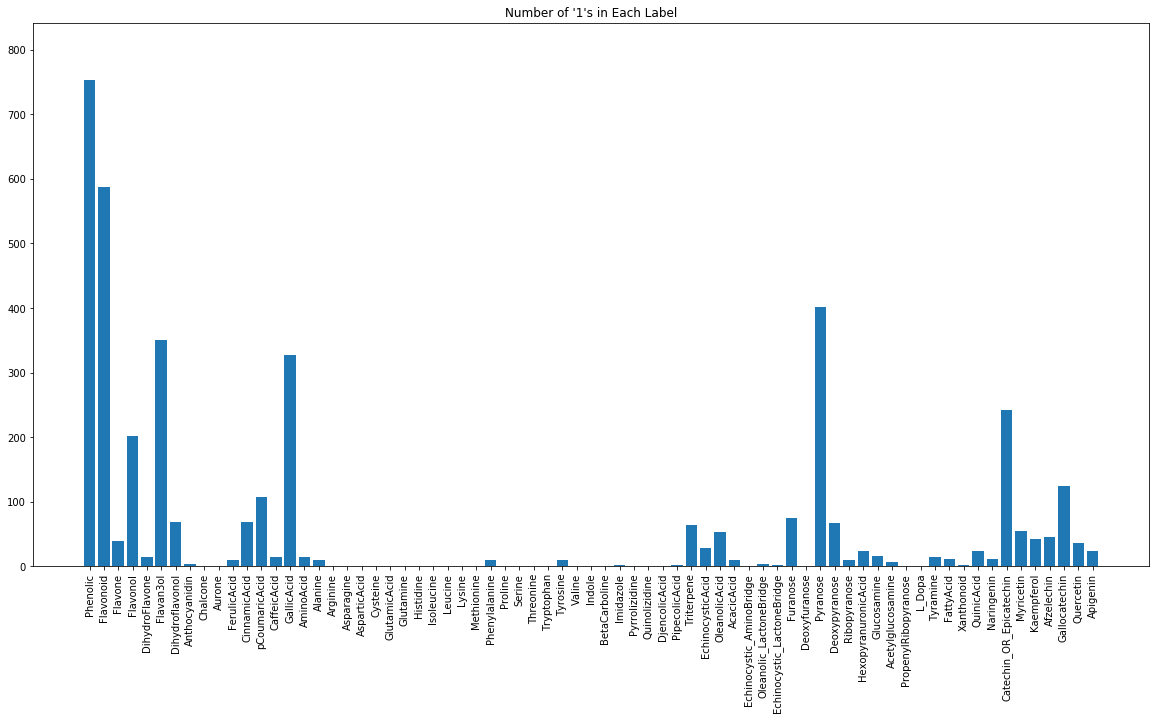

In [153]:
plt.bar(np.arange(n_labels_inga),n_ones_inga)
plt.xticks(np.arange(n_labels_inga), n_ones_inga.index, rotation='vertical')
plt.ylim([0,n_records_inga])
plt.title('Number of \'1\'s in Each Label')
plt.show()

### In Silico Data

In [154]:
y_silico = new_classes_silico.iloc[:,:-1]
y_silico.head()

,Phenolic,Flavonoid,Flavone,Flavonol,DihydroFlavone,Flavan3ol,Dihydroflavonol,Anthocyanidin,Chalcone,Aurone,...,Xanthonoid,QuinicAcid,Naringenin,Catechin_OR_Epicatechin,Myricetin,Kaempferol,Afzelechin,Gallocatechin,Quercetin,Apigenin
comp_id,,,,,,,,,,,,,,,,,,,,,
0,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
n_ones_silico =  y_silico.sum()
n_records_silico =  y_silico.shape[0]
n_labels_silico =  y_silico.shape[1]

In [156]:
for i in range(n_labels_silico):
    print('{0:35s} {1:3d} / {2:3d}'.format(n_ones_silico.index[i], int(n_ones_silico[i]), n_records_silico))

Phenolic                            38452 / 75711
Flavonoid                           11817 / 75711
Flavone                             5199 / 75711
Flavonol                            4989 / 75711
DihydroFlavone                      1822 / 75711
Flavan3ol                           1651 / 75711
Dihydroflavonol                     759 / 75711
Anthocyanidin                         4 / 75711
Chalcone                             19 / 75711
Aurone                              142 / 75711
FerulicAcid                         1922 / 75711
CinnamicAcid                        1627 / 75711
pCoumaricAcid                       2214 / 75711
CaffeicAcid                         1779 / 75711
GallicAcid                          2339 / 75711
AminoAcid                           5530 / 75711
Alanine                             658 / 75711
Arginine                              2 / 75711
Asparagine                          133 / 75711
AsparticAcid                        111 / 75711
Cysteine                  

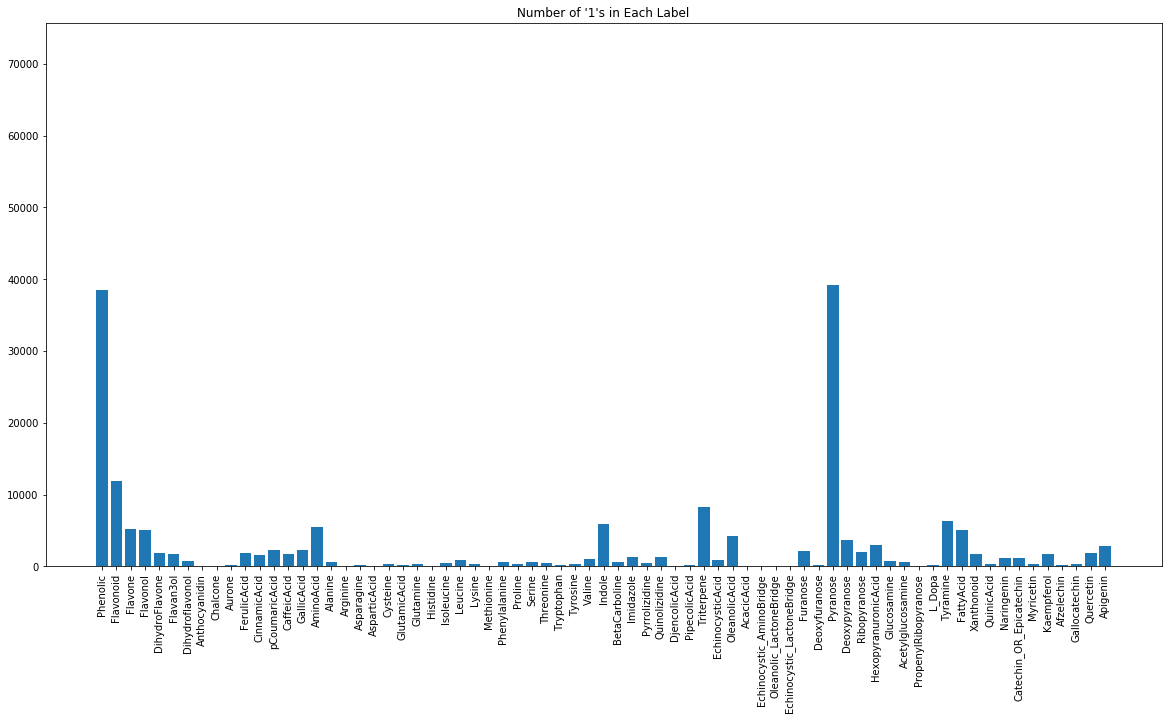

In [158]:
plt.bar(np.arange(n_labels_silico),n_ones_silico)
plt.xticks(np.arange(n_labels_silico), n_ones_silico.index, rotation='vertical')
plt.ylim([0,n_records_silico])
plt.title('Number of \'1\'s in Each Label')
plt.show()

## Writing to Files

In [161]:
save_npz('features_inga', mat_features_inga)

In [162]:
save_npz('features_silico', mat_features_silico)

In [163]:
np.save('features_inga', mat_features_inga.todense())

In [164]:
np.save('features_silico', mat_features_silico.todense())

In [165]:
np.save('classes_inga', mat_classes_inga)

In [166]:
np.save('classes_silico', mat_classes_silico)